# DRILLING PROBLEM

### Instance: A set of points $p_{1}, \dots ,p_{n} \in \mathbb{R}^{2}$
### Task: Find a permutation $\pi : \{1, \dots, n \} \rightarrow \{1, \dots, n \}$ such that $\Sigma^{n-1}_{i=1} d(p_{\pi(i)}, p_{\pi(i + 1)})$ is minimum. 


In [18]:
!pip install peqnp
!pip install numpy
!pip install matplotlib

67 [3 9 7 6 1 2 5 8 0 4]


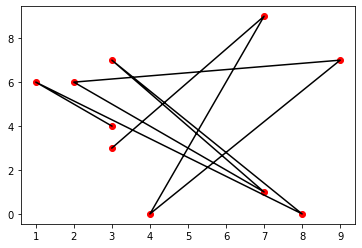

42 [9 2 3 4 8 7 6 1 5 0]


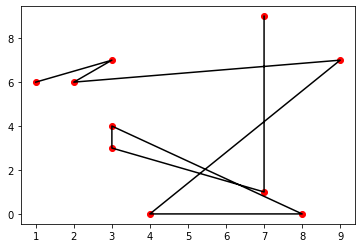

41 [9 1 7 8 2 0 5 6 3 4]


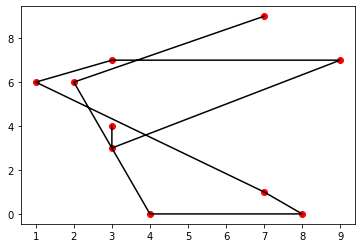

39 [6 4 0 5 9 1 2 8 3 7]


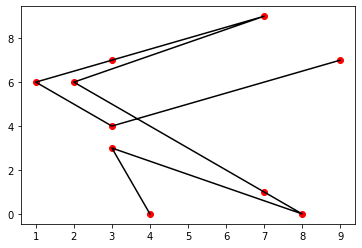

38 [9 7 2 8 4 6 5 1 0 3]


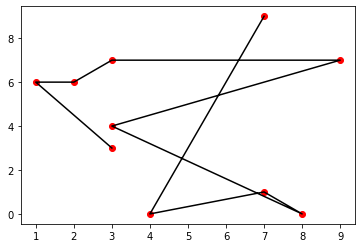

35 [6 9 5 4 3 7 8 1 0 2]


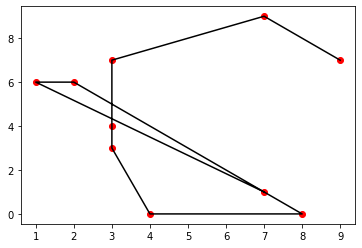

31 [3 0 2 8 7 4 1 5 9 6]


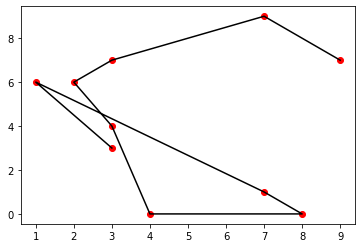

29 [1 4 3 7 2 8 6 9 0 5]


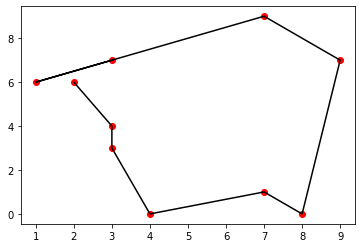

28 [2 8 6 9 5 1 0 7 3 4]


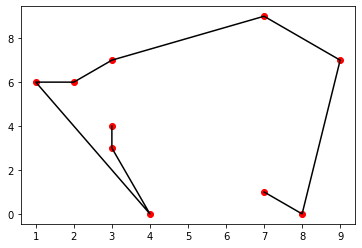

27 [0 1 5 9 4 3 7 2 8 6]


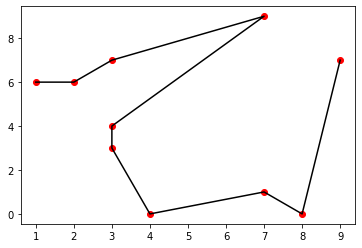

26 [8 2 7 3 1 0 4 5 6 9]


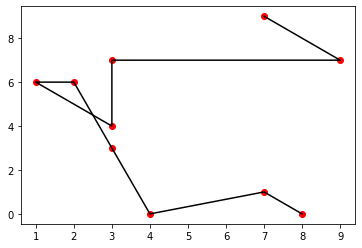

22 [6 9 5 0 1 3 4 7 2 8]


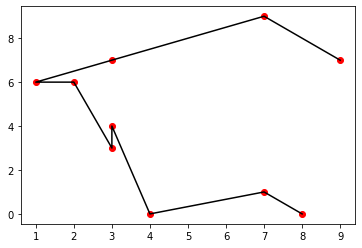

21 [2 8 7 3 4 1 0 5 9 6]


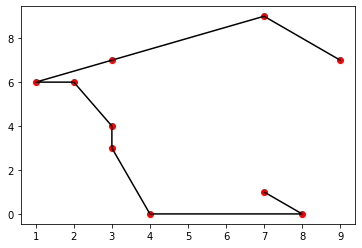

20 [6 9 5 1 0 4 3 7 2 8]


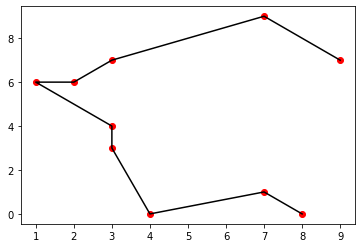

In [19]:
import numpy as np
import peqnp as pn
import matplotlib.pyplot as plt

n = 10
ds = np.random.randint(0, 10, size=(n, 2))

mx = np.zeros(shape=(n, n))
for i in range(n):
    for j in range(n):
        mx[i][j] = np.round(np.linalg.norm(ds[i] - ds[j]))

opt = mx.sum()
while True:
    pn.engine(int(mx.sum()).bit_length())

    xs, ys = pn.matrix_permutation(mx.flatten(), n)

    assert sum(ys[:-1]) < opt

    if pn.satisfy(turbo=True):
        opt = sum(ys[:-1])
        xs = np.vectorize(int)(xs)
        print(opt, xs)
        a, b = zip(*ds[xs])
        plt.plot(a, b, 'ro')
        plt.plot(a, b, 'k-')
        plt.show()
        plt.close()
    else:
        break

 # DRILLING PROBLEM APROXIMATION WITH HESS BLACK-BOX ALGORITHM (O. Riveros)

20.0 [6, 9, 5, 1, 0, 4, 3, 7, 2, 8]


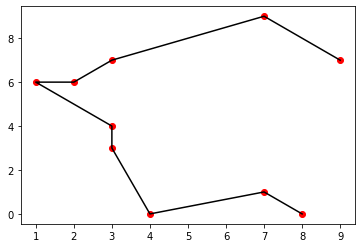

In [20]:
def oracle(seq):
    return sum(np.round(np.linalg.norm(ds[seq[i + 1]] - ds[seq[i]])) for i in range(n - 1))

seq = pn.hess_sequence(n, oracle=oracle, fast=False)

print(oracle(seq), seq)
a, b = zip(*ds[seq])
plt.plot(a, b, 'ro')
plt.plot(a, b, 'k-')
plt.show()
plt.close()